In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

/home/yoh010/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/yoh010/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
def salary_growing_by_year(state, occ_code, display=0):
    df = pd.read_csv('./filtered_state_M2022_dl.csv')
    result = df.loc[(df['AREA_TITLE'] == state) & (df['OCC_CODE'] == occ_code)]
    A_PCT10 = int(result['A_PCT10'].values[0])
    A_PCT25 = int(result['A_PCT25'].values[0])
    A_MEDIAN = int(result['A_MEDIAN'].values[0])
    if result['A_PCT75'].values[0] == '#':
#         print('##')
        A_PCT75 = 2*A_MEDIAN - A_PCT25
    else:
        A_PCT75 = int(result['A_PCT75'].values[0])

    if result['A_PCT90'].values[0] == '#':
#         print('##')
        A_PCT90 = 2*A_PCT75 - A_MEDIAN
    else:
        A_PCT90 = int(result['A_PCT90'].values[0])
    # A_PCT90
    x = np.array([0, 5, 10, 15, 20])
    y = np.array([A_PCT10, A_PCT25, A_MEDIAN, A_PCT75, A_PCT90])
    
    coeff = np.polyfit(x, y, 3)
    
    coeff = np.polyfit(x, y, 3)

    if display :
        # Generate values for the curve
        x_curve = np.linspace(0, 20, 100)
        poly_function = np.poly1d(coeff)
        y_curve = poly_function(x_curve)

        # Plotting the original data points and the fitted curve
        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, label='Original Data Points')
        plt.plot(x_curve, y_curve, color='red', label='Fitted Curve')
        plt.xlabel('Years')
        plt.ylabel('Salaries')
        plt.title(f'Fitted Polynomial Curve for')
        plt.legend()
        plt.grid(True)
        plt.show()

    return coeff

In [3]:
# df.loc[df['A_MEDIAN'] == '#']

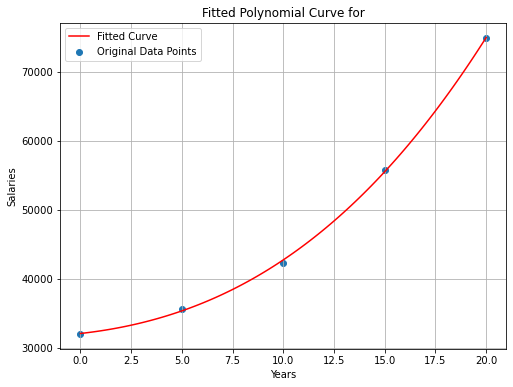

In [4]:
state = 'California'
occ_code = '51-0000'
coeff = salary_growing_by_year(state, occ_code, display = 1)

In [5]:
coeff

array([1.7000e+00, 5.6800e+01, 3.2850e+02, 3.2059e+04])

In [6]:
coeff[0]

1.700000000000014